<a href="https://colab.research.google.com/github/sangitaGIT011/Myproj/blob/main/Gold_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

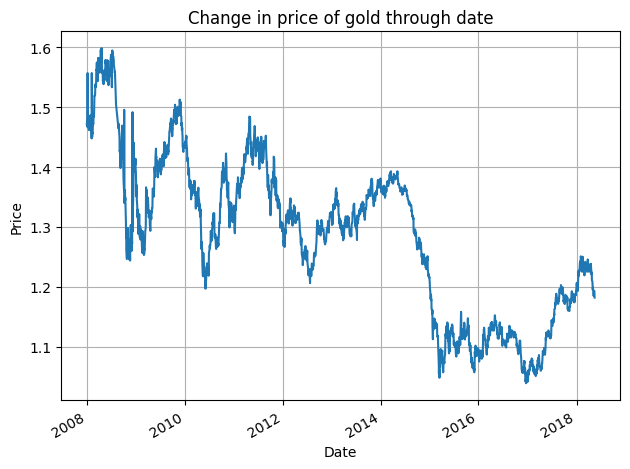

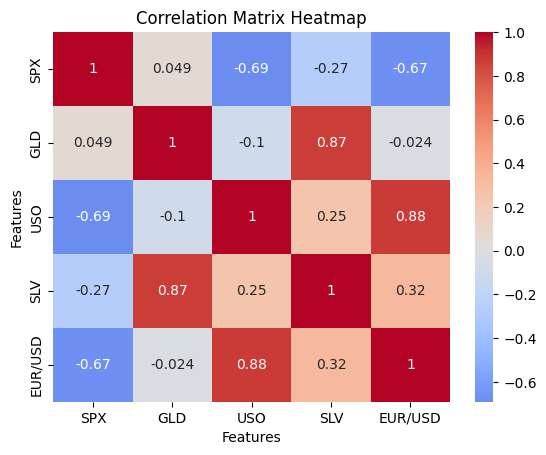

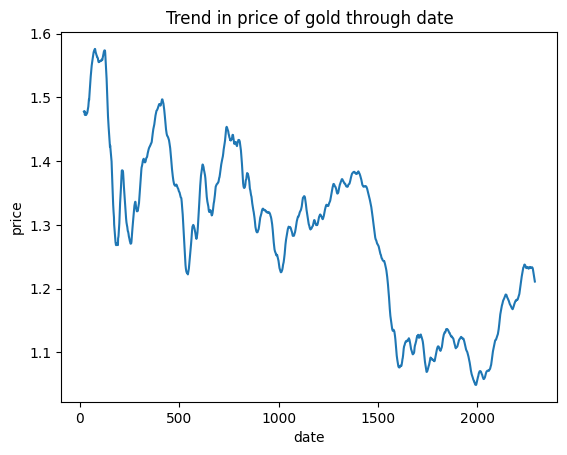

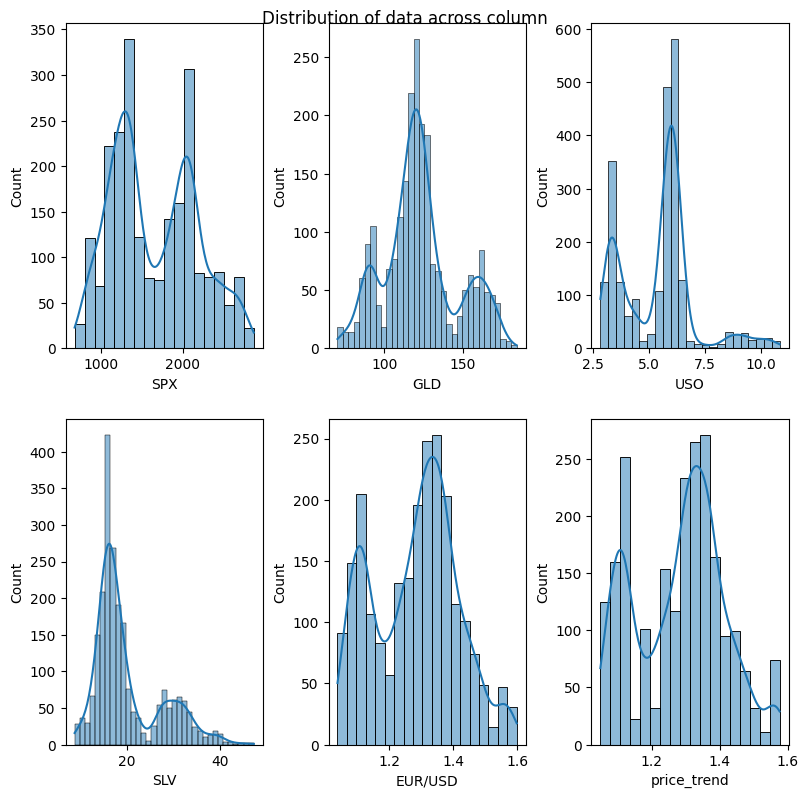

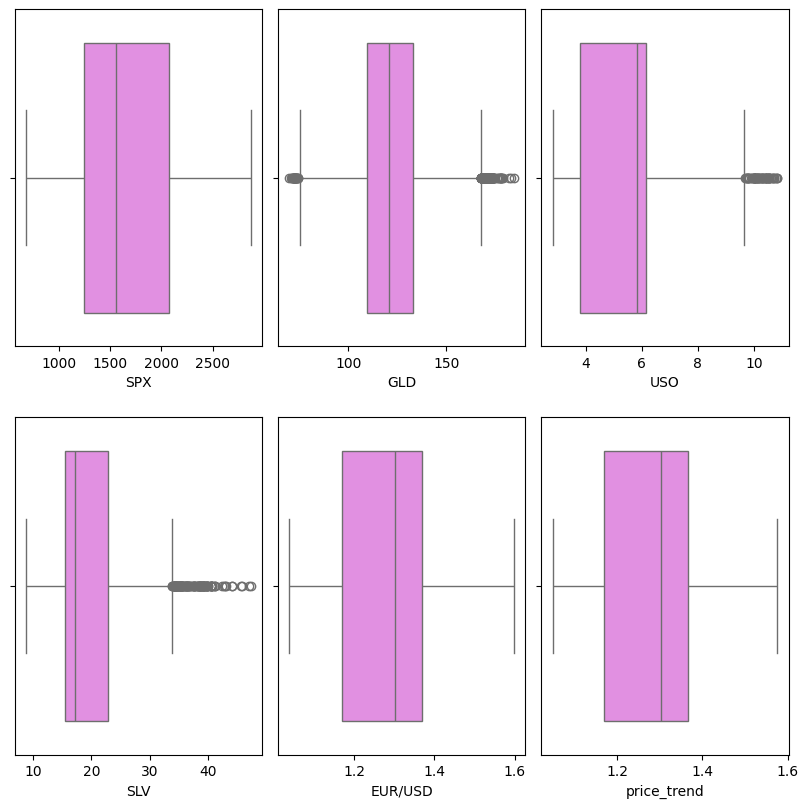

SPX            0.300362
GLD            0.334138
USO            0.599864
SLV            1.153641
EUR/USD       -0.005292
price_trend   -0.029588
dtype: float64


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv("https://raw.githubusercontent.com/sangitaGIT011/Myproj/refs/heads/main/gold_price_data.csv")


#  Convert 'Date' column to datetime (if not already)
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Set 'Date' as index
dataset.set_index('Date', inplace=True)

# 3. Plot EUR/USD (or whatever column you're using)
dataset["EUR/USD"].plot()

# 4. Add labels and title
plt.title("Change in price of gold through date")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()

# 5. Show the plot
plt.show()
print('===============')
# drop SlV column
#dataset.drop("Date", axis=1,
 #            inplace=True)

# Calculate correlation matrix
correlation  = dataset.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()
print('===============')
# apply rolling mean with window size of 3
dataset["price_trend"] = dataset["EUR/USD"]\
    .rolling(window=20).mean()

# reset the index to date column
dataset.reset_index("Date", inplace=True)

# since we have used rolling method
# for 20 rows first 2 rows will be NAN
dataset["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()
print('===============')

fig = plt.figure(figsize=(8, 8))

# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = dataset.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=dataset, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()
print('===============')


fig = plt.figure(figsize=(8, 8))
temp = dataset.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=dataset, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

print('===============')
# skewness along the index axis

print(dataset.drop("Date", axis=1).skew(axis=0, skipna=True))



#dataset.head(100)